In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("./data/wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df = df.drop('id', axis=1)
df = df.fillna(value=0)
data = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X1 = data.values

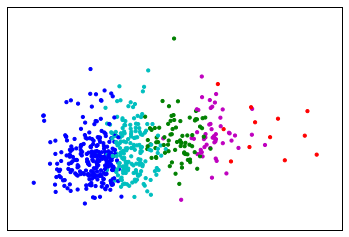

20787774.2138
Homogeneity: 0.612
Completeness: 0.314


In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

model = KMeans(n_clusters=5, n_init=1, max_iter=10, algorithm='elkan', tol=1e-4, verbose=False)
model.fit(X1)
labels = model.labels_

plt.scatter(X1[:, 0], X1[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))

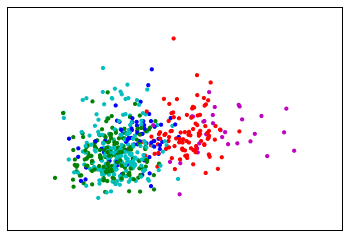

156.763042238
Homogeneity: 0.657
Completeness: 0.300


In [4]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X1 = X1.astype(np.float64)
X2 = min_max_scaler.fit_transform(X1)

model = KMeans(n_clusters=5, n_init=1, max_iter=10, algorithm='elkan', tol=1e-4, verbose=False)
model.fit(X2)
labels = model.labels_

plt.scatter(X2[:, 0], X2[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))

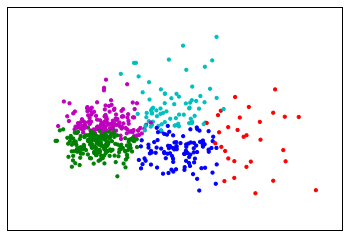

141.837247351
Homogeneity: 0.664
Completeness: 0.302


In [5]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.MinMaxScaler()
X1 = X1.astype(np.float64)
X2 = min_max_scaler.fit_transform(X1)

pca = PCA(n_components=10)
X3 = pca.fit_transform(X2)

model = KMeans(n_clusters=5, n_init=1, max_iter=10, algorithm='elkan', tol=1e-4, verbose=False)
model.fit(X3)
labels = model.labels_

plt.scatter(X3[:, 0], X3[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))